# 过程
1. wikiextractor
2. opencc
3. jieba
4. gensim
5. t-sne

In [1]:
!ls

Word2Vec.ipynb   wiki_02_chs      wiki_06_chs      wiki_10_chs
train_corpus.txt wiki_03_chs      wiki_07_chs      wiki_11_chs
wiki_00_chs      wiki_04_chs      wiki_08_chs      wiki_12_chs
wiki_01_chs      wiki_05_chs      wiki_09_chs      word2vecModel


In [2]:
import jieba
import time
import os
import re

In [3]:
target_file = os.listdir()

In [7]:
target_file

['.DS_Store',
 '.ipynb_checkpoints',
 'Untitled.ipynb',
 'wiki_00_chs',
 'wiki_01_chs',
 'wiki_02_chs',
 'wiki_03_chs',
 'wiki_04_chs',
 'wiki_05_chs',
 'wiki_06_chs',
 'wiki_07_chs',
 'wiki_08_chs',
 'wiki_09_chs',
 'wiki_10_chs',
 'wiki_11_chs',
 'wiki_12_chs']

In [11]:
def write_token_to_f(open_file, output_file):
    words = []
    for line in open(open_file):        
        pattern='<.*?>'
        line = re.sub(pattern,'',line)
        w = list(jieba.cut(line))
        words += w + ['\n']
        ## 繁体字转换成简体字
    output_file.writelines(' '.join(words))

In [12]:
start = time.time()
with open('train_corpus.txt', 'a+') as output_f:
    num = 0
    for file in target_file:
        if not file.startswith('wiki'): continue
        print(file)
        write_token_to_f(file, output_f)
        end = time.time()
        print('used time {}'.format(end - start))

Building prefix dict from the default dictionary ...


wiki_00_chs


Dumping model to file cache /var/folders/_1/8g6kq5zs3h97jlvhdzj6dldc0000gp/T/jieba.cache
Loading model cost 1.015 seconds.
Prefix dict has been built succesfully.


used time 236.0563840866089
wiki_01_chs
used time 448.4593279361725
wiki_02_chs
used time 659.8500609397888
wiki_03_chs
used time 878.0400121212006
wiki_04_chs
used time 1088.2870519161224
wiki_05_chs
used time 1298.5037188529968
wiki_06_chs
used time 1508.7038509845734
wiki_07_chs
used time 1702.8004410266876
wiki_08_chs
used time 1903.5514249801636
wiki_09_chs
used time 2108.4579288959503
wiki_10_chs
used time 2314.3843450546265
wiki_11_chs
used time 2522.1977961063385
wiki_12_chs
used time 2610.3320848941803


In [4]:
from gensim.models import Word2Vec

In [5]:
from gensim.models.word2vec import LineSentence

## Word2Vec min_count=1

In [6]:
s = time.time()
model = Word2Vec(LineSentence('train_corpus.txt'), min_count=1, size=20)
e = time.time()
print(e-s)

1691.009609222412


In [8]:
model.wv['数字']

array([  9.37350368e+00,  -3.05406260e+00,   2.86886716e+00,
        -3.30319524e+00,  -3.53633308e+00,  -2.84665346e+00,
         2.82397223e+00,  -4.41206503e+00,   7.21808970e-01,
         1.29053307e+00,  -1.39914227e+00,  -2.52191782e+00,
         2.11612630e+00,   6.32756948e+00,   1.99228358e+00,
        -7.40447700e-01,  -2.41057426e-01,   3.25577855e+00,
         6.86880387e-03,  -9.86657739e-01], dtype=float32)

In [9]:
model.most_similar('数字')

/Users/Gago/Workplace/Software/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('栏位', 0.8833621740341187),
 ('选项', 0.8700581192970276),
 ('表格', 0.8663430213928223),
 ('十进制', 0.8559514880180359),
 ('倍数', 0.846534252166748),
 ('该表', 0.845130980014801),
 ('二进制', 0.843329131603241),
 ('字符', 0.8416087627410889),
 ('位数', 0.8410125970840454),
 ('字节', 0.8378385901451111)]

In [10]:
model.wv.similarity('奥运会','金牌')

0.7909831726786567

In [23]:
model.most_similar('包子')

/Users/Gago/Workplace/Software/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('大饼', 0.9436948895454407),
 ('汤圆', 0.9405986070632935),
 ('𩠌', 0.9339711666107178),
 ('美酒', 0.9335252642631531),
 ('豆腐', 0.9325928688049316),
 ('扒', 0.9298520088195801),
 ('饺子', 0.9267572164535522),
 ('烧鹅', 0.9243295192718506),
 ('粥', 0.9206432700157166),
 ('烧肉', 0.9190057516098022)]

In [22]:
model.wv.similarity('包子','馒头')

0.91194286206589181

In [18]:
model.wv.most_similar(['纽约','中国'],['上海'])

[('美国', 0.8794705867767334),
 ('澳大利亚', 0.863916277885437),
 ('欧洲', 0.8517866134643555),
 ('加拿大', 0.8362946510314941),
 ('拉丁美洲', 0.8269345760345459),
 ('新西兰', 0.8229615092277527),
 ('哥伦比亚', 0.8216909170150757),
 ('北美', 0.8191179633140564),
 ('英国', 0.8087191581726074),
 ('中东地区', 0.8075399398803711)]

In [16]:
model.save('./word2vecModel/WikiCHModel')

## min_count=500

In [6]:
s = time.time()
model = Word2Vec(LineSentence('train_corpus.txt'), min_count=500, size=20,workers=4)
e = time.time()
print(e-s)

1254.0730140209198


In [11]:
#model.save('./word2vecModel/WikiCHModel_500')

In [6]:
model = Word2Vec.load('./word2vecModel/WikiCHModel_500')

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
model.wv['数字']

array([-0.79907197,  0.53330344,  1.13293552,  1.2680198 , -1.71433151,
        2.08634567, -2.11541009,  2.62733912,  4.64578819, -0.42947128,
        0.47074923, -0.01501875, -1.4127183 ,  2.72399211,  1.90503466,
        7.69000816,  4.52066851, -2.96175933,  6.18553591,  1.03587413], dtype=float32)

In [9]:
model.wv.most_similar('数字')

[('表格', 0.8750139474868774),
 ('字节', 0.8657186031341553),
 ('二进制', 0.8584157228469849),
 ('选项', 0.8360629081726074),
 ('十进制', 0.8353896141052246),
 ('位数', 0.8283064365386963),
 ('字符', 0.8256781101226807),
 ('格式', 0.8206032514572144),
 ('Unicode', 0.8131027221679688),
 ('页面', 0.8086092472076416)]

In [10]:
model.wv.similarity('奥运会','金牌')

0.76599640015994319

In [11]:
model.wv.most_similar(['纽约','中国'],['上海'])

[('美国', 0.8215506076812744),
 ('华尔街', 0.7850805521011353),
 ('好莱坞', 0.7770995497703552),
 ('全世界', 0.7766847610473633),
 ('世界', 0.7678723335266113),
 ('加拿大', 0.7642465829849243),
 ('澳大利亚', 0.7539073824882507),
 ('有史以来', 0.7528812289237976),
 ('哥伦比亚', 0.7511743307113647),
 ('世界性', 0.748670756816864)]

In [12]:
from sklearn.manifold import TSNE

In [17]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    #time1 = time.time()
    labels = []
    tokens = []
    num=0
    for word in model.wv.vocab:
        #if num>1000:break
        tokens.append(model[word])
        labels.append(word)
        #num += 1
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    #time2 = time.time()
    #print(time2-time1)
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    #time3 = time.time()
    #print(time3-time2)
    plt.show()

/Users/Gago/Workplace/Software/Anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


58.18678689002991
2.204538106918335


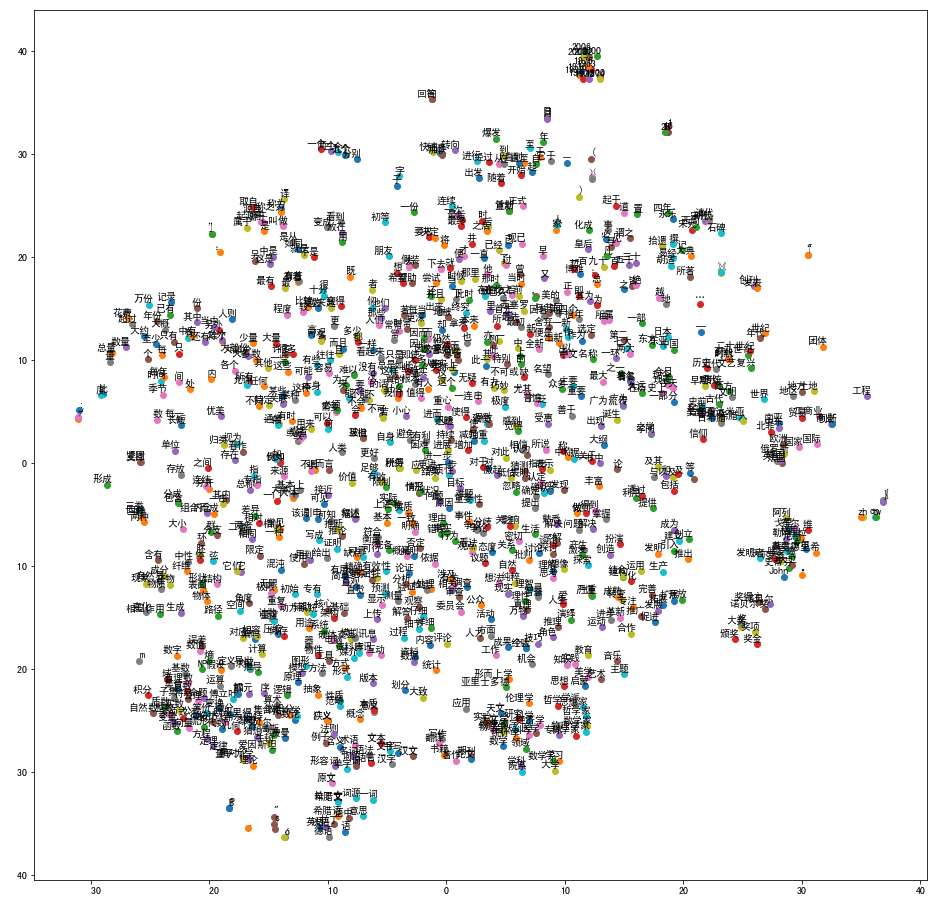

In [16]:
tsne_plot(model) #选取前1000